# Isolation Forest



## 0.환경준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest # Isolation Forest!
from sklearn.metrics import *

from tqdm import tqdm
import warnings
warnings.simplefilter(action='ignore')

## 1.Isolation Forest 개념이해

> sklearn help : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html  
Isolation Forest Original Paper : https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest

### (1) 샘플데이터 가져오기

In [2]:
# Single Blob
X1 = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Anomaly_X.csv')

# Double Blob
X2 = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Anomaly_X2.csv')

### (2) 모델 시각화 함수

* 모델 시각화 함수 만들기 : 실전에서는 사용하기 어렵습니다. 교육적인 이해를 돕고자 사용합니다.

In [3]:
def model_visualize(model, v1, v2, title = "") :
    # 메쉬그리드값 저장하기
    xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

    # 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
    Z = Z.reshape(xx.shape)
    # 시각화
    plt.figure(figsize = (8,8))
    plt.title(title)

    # 메쉬그리드 값의 Anomaly Score에 대한 등고선
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

    # 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
    sns.scatterplot(x=v1, y=v2, sizes = 30, edgecolor='k', hue = pred, palette=['white', 'orange'])

    plt.axis("tight")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

### (3) Single Blob

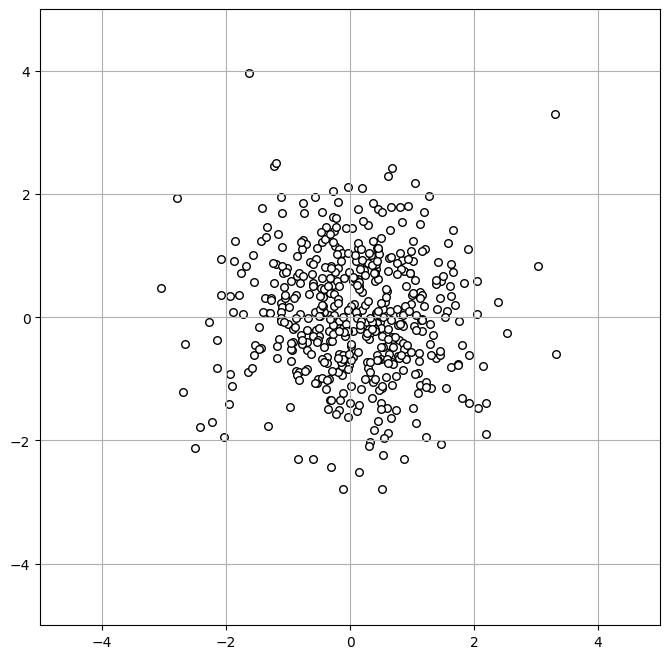

In [4]:
# sample data
plt.figure(figsize = (8,8))

plt.scatter(X1['v1'], X1['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* Isolation Forest 모델을 일단 만들어 봅시다.

In [5]:
# 모델링
model = IsolationForest(contamination = 0.1, n_estimators = 50 )
model.fit(X1)
pred = model.predict(X1)
pred

array([-1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [6]:
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

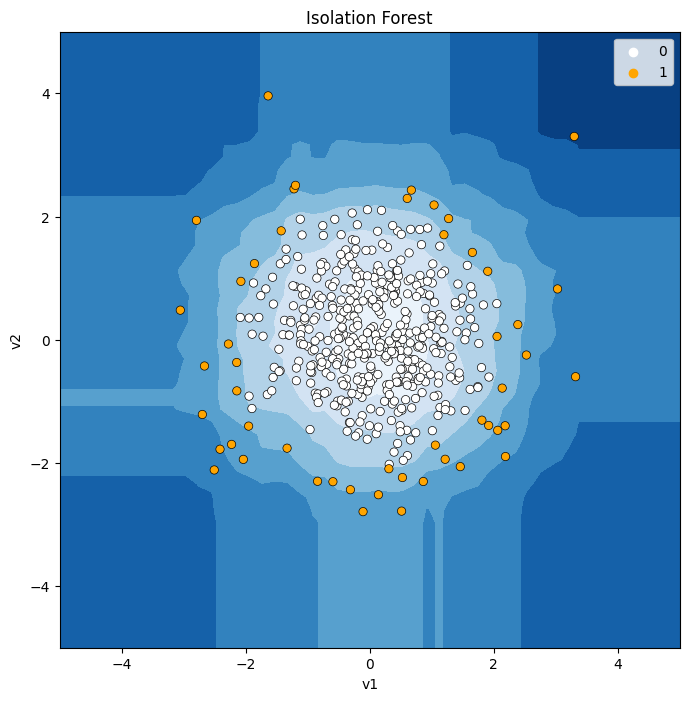

In [7]:
model_visualize(model, X1['v1'], X1['v2'], 'Isolation Forest')

* 몇가지를 조절해 봅시다.
    * contamination
        * Score 계산 후, 이상치로 간주할 비율
    * n_estimators 
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

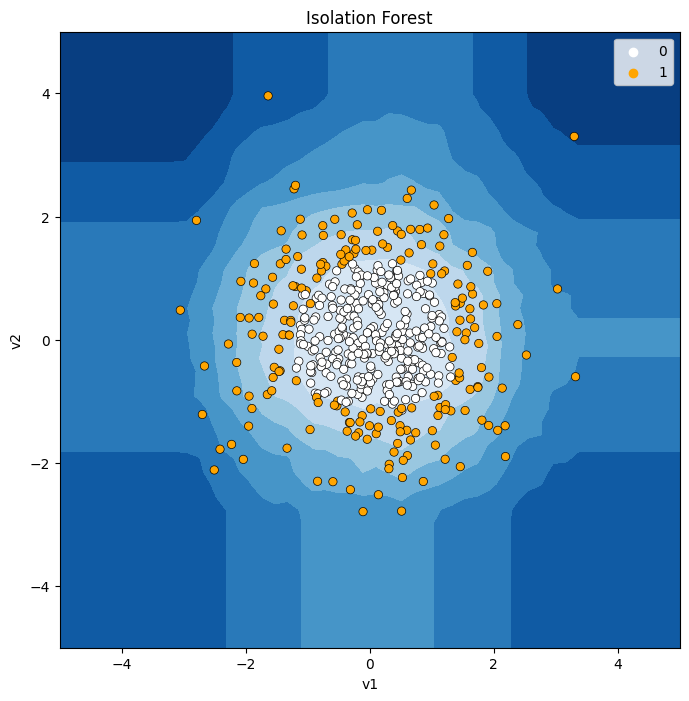

In [8]:
# 여기를 조정해 봅시다.
cont = 0.4
n_est = 100

# 모델링
model = IsolationForest(contamination = cont, n_estimators = n_est
                        , random_state = 2022)
model.fit(X1)
pred = model.predict(X1)
pred = np.where(pred == 1, 0, 1)

model_visualize(model, X1['v1'], X1['v2'], 'Isolation Forest')

### (4) Double Blob

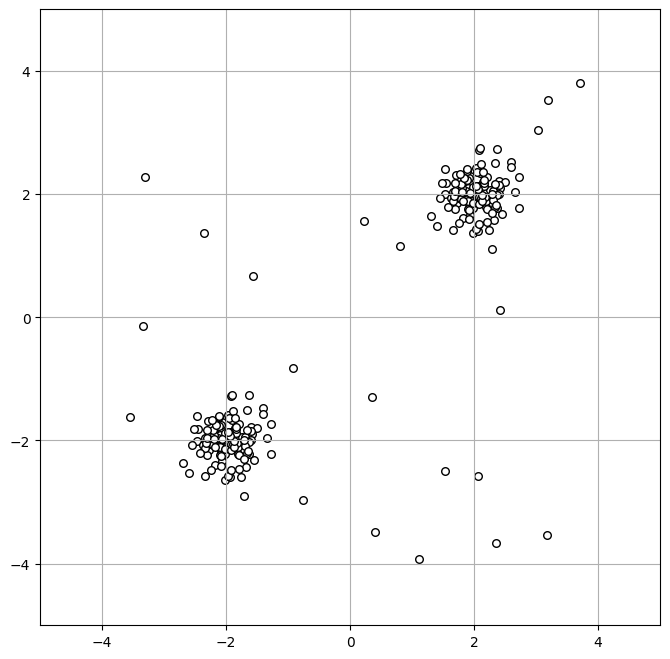

In [9]:
plt.figure(figsize = (8,8))

plt.scatter(X2['v1'], X2['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* Isolation Forest 모델을 일단 만들어 봅시다.

In [10]:
# 모델링
model = IsolationForest(contamination = 0.1, n_estimators = 50 )
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

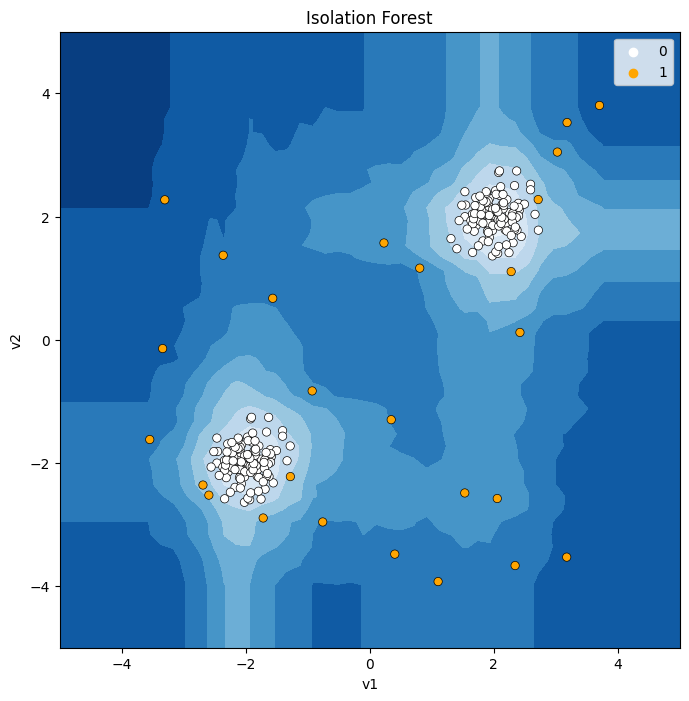

In [11]:
model_visualize(model, X2['v1'], X2['v2'], 'Isolation Forest')

* 몇가지를 조절해 봅시다.
    * contamination
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * n_estimators 
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

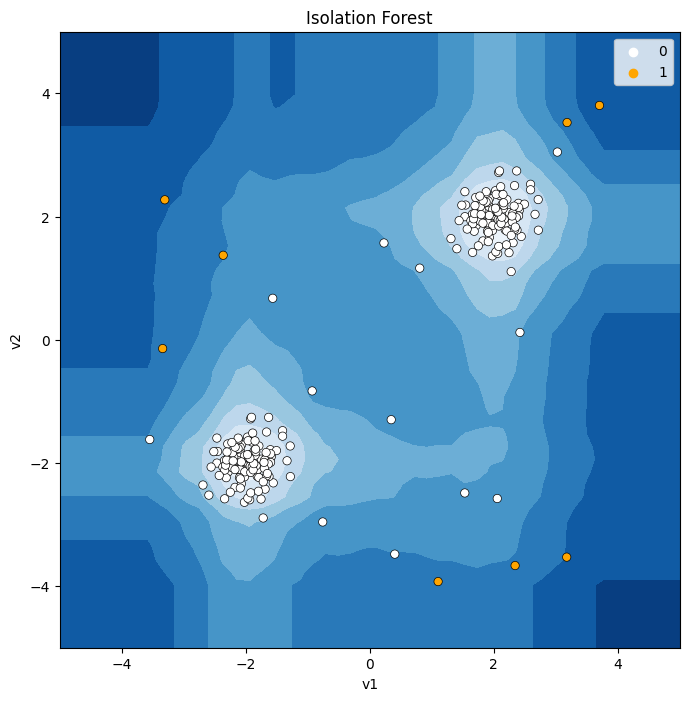

In [12]:
# 여기를 조정해 봅시다.
cont = 0.03
n_est = 300

# 모델링
model = IsolationForest(contamination = cont, n_estimators = n_est
                        , random_state = 2022)
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

# 모델 시각화
model_visualize(model, X2['v1'], X2['v2'], 'Isolation Forest')

## 2.직원 이직 여부를 예측해 봅시다.
이제 시각화가 불가능합니다.^^

### (1) 데이터 준비

* 데이터 로딩

In [13]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


* x, y 로 나누기

In [14]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [15]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화


In [16]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

* 데이터 분할

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state=2022)

In [18]:
x_train.shape, y_train.shape

((805, 38), (805,))

### (2) Step1 : 기본모델링

#### 1) 학습

* Isolation Forest 모델은 Anomaly Score를 계산합니다.  
* **contamination** 값은 그 중 **Abnormal**로 간주할 비율을 의미합니다.


* contamination : 학습할 데이터에서 Abnormal 비율 만큼을 지정해 봅시다.

In [19]:
cont = (y_train.value_counts() / len(y_train))[1]
print(cont)

0.0968944099378882


In [ ]:
# 기존 데이터에서의 Abnormal 비율을 지정해서 모델링 해 봅시다.
cont = (y_train.value_counts() / len(y_train))[1]
print(cont)
model = IsolationForest(contamination = cont, random_state = 20)

0.0968944099378882


In [21]:
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


In [23]:
# contamination = y_train 에서 1비율
# n_estimators  = 200   # 트리의 개수
# max_samples = 500     # 샘플의 개수
# random_state = 2023   # 랜덤 시드값.

model = IsolationForest(contamination=cont, n_estimators = 200,
                        max_samples = 500, random_state = 2023)

model.fit(x_train)

# 예측
pred = model.predict(x_val) # -1(Abnormal), 1(Normal)
pred = np.where(pred == 1, 0, 1)

# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       323
           1       0.13      0.27      0.17        22

    accuracy                           0.83       345
   macro avg       0.54      0.57      0.54       345
weighted avg       0.89      0.83      0.86       345



* 비지도 학습이므로 x_train 만 입력합니다!!

In [ ]:
model.fit(x_train)

IsolationForest(contamination=0.0968944099378882, random_state=20)

#### 2) 예측

* predict : scoring 하고 나서 contamination에 지정한 비율로 abnormal 구분
    * abnormal = -1
    * normal = 1
* 값 변환
    * 해당 논문에는 0 : normal, 1 : abnormal 로 설명하고 있고,
    * 데이터도 이렇게 저장되어 있으므로 변환하기

In [ ]:
pred = model.predict(x_val)
pred

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1

In [ ]:
pred = np.where(pred == 1,0,1)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# 평가
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[277  46]
 [ 18   4]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       323
           1       0.08      0.18      0.11        22

    accuracy                           0.81       345
   macro avg       0.51      0.52      0.50       345
weighted avg       0.88      0.81      0.85       345



### (3) Step2 : Scoring & 최적의 cutoff 찾기

* .score_samples() : 
    * 결과가 -1 ~ 0 까지로, -1에 가까울 수록 이상치
    * 그러나, 원 논문에서는 anomaly score는 0 ~ 1 사이 값으로 1에 가까울 수록 이상치라고 기술되어 있습니다.
    * 그러므로 우리도 비지도학습의 모든 Score를 
        * 0에 가까울 수록 Normal
        * 0에서 멀어질 수록 Abnormal로 정하겠습니다.

#### 1) x_train으로 scoring

In [ ]:
score = model.score_samples(x_train)
score

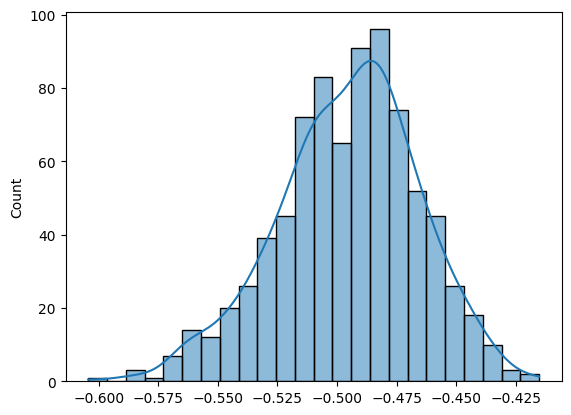

In [ ]:
# score의 분포를 보면, -1 ~ 0
sns.histplot(score, kde = True)
plt.show()

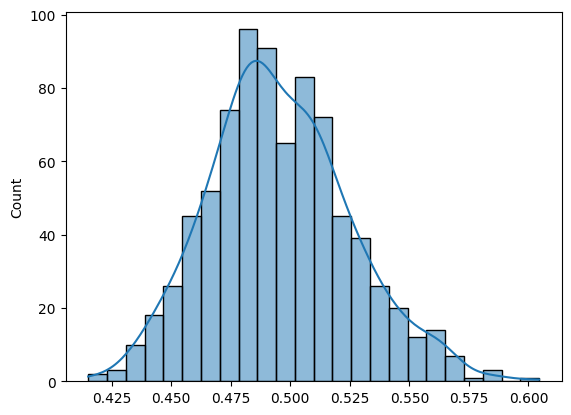

In [ ]:
# 그러므로 score에 -1을 곱해주자.
score = -1 * score 

sns.histplot(score, kde = True)
plt.show()

#### 2) contamination 으로 지정된 값은 어디까지?

* percentile을 이용하면 전체 데이터에서 몇 % 지점의 값이 얼마인지 알수 있습니다.

In [ ]:
cont

0.0968944099378882

In [ ]:
# np.percentile(값들, % )
co = np.percentile(score, (1-cont)*100)
co

0.534649445456142

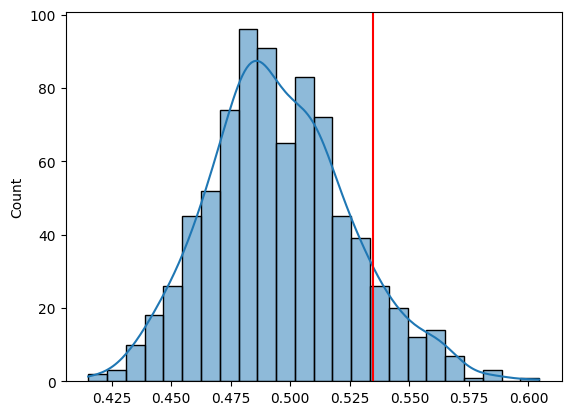

In [ ]:
sns.histplot(score, kde = True)
plt.axvline(co, color = 'r')
plt.show()

#### 3) x_val로 scoring

* x_val로 scoring 하고, 
* 학습시 지정한 cont 값으로 잘라 1,0으로 나누면
* model.predict 결과와 같다.

In [ ]:
val_score = model.score_samples(x_val)
val_score = -1 * val_score

In [ ]:
pred2 = np.where(val_score >= co, 1, 0)

# 평가
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

[[277  46]
 [ 18   4]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       323
           1       0.08      0.18      0.11        22

    accuracy                           0.81       345
   macro avg       0.51      0.52      0.50       345
weighted avg       0.88      0.81      0.85       345



#### 4) cut-off (normal : abnormal)value를 조절해가며 지표 계산 및 그래프 그리기

* prec_rec_f1_curve 함수 만들기
    * sklearn에서는 precision, recall curve만 제공됩니다.
    * 그래서, f1 curve도 추가해서 구하고, plot을 그립니다.

In [ ]:
from sklearn.metrics import precision_recall_curve

def prec_rec_f1_curve(y, score, pos = 1) :

    # precision, recall, f1 계산
    precision, recall, thresholds  = precision_recall_curve(y, score, pos_label=1)
    f1 = 2 / (1/precision + 1/recall)

    # 그래프 그리기
    plt.figure(figsize = (12,8))
    plt.plot(thresholds, np.delete(precision, -1), label = 'precision')
    plt.plot(thresholds, np.delete(recall, -1), label = 'recall')
    plt.plot(thresholds, np.delete(f1, -1), label = 'f1')

    #-------------------------------------------------------------------------
    # 아래 코드는 차트 꾸미기 입니다. 
    # f1를 최대화 해주는 threshold
    thre = round(thresholds[np.argmax(f1)],4)
    f1s = round(max(f1),4)
    plt.axvline(thre , color = 'darkred', linewidth = .7)
    plt.axhline( f1s, color = 'darkred', linewidth = .7)
    plt.text(thre, .5, thre, color = 'darkred')
    plt.text(min(thresholds), f1s, f1s, color = 'darkred')

    plt.xlabel('Anomaly Score')
    plt.ylabel('Performance')
    plt.legend()
    plt.grid()
    plt.show()

    return precision, recall, f1, thresholds

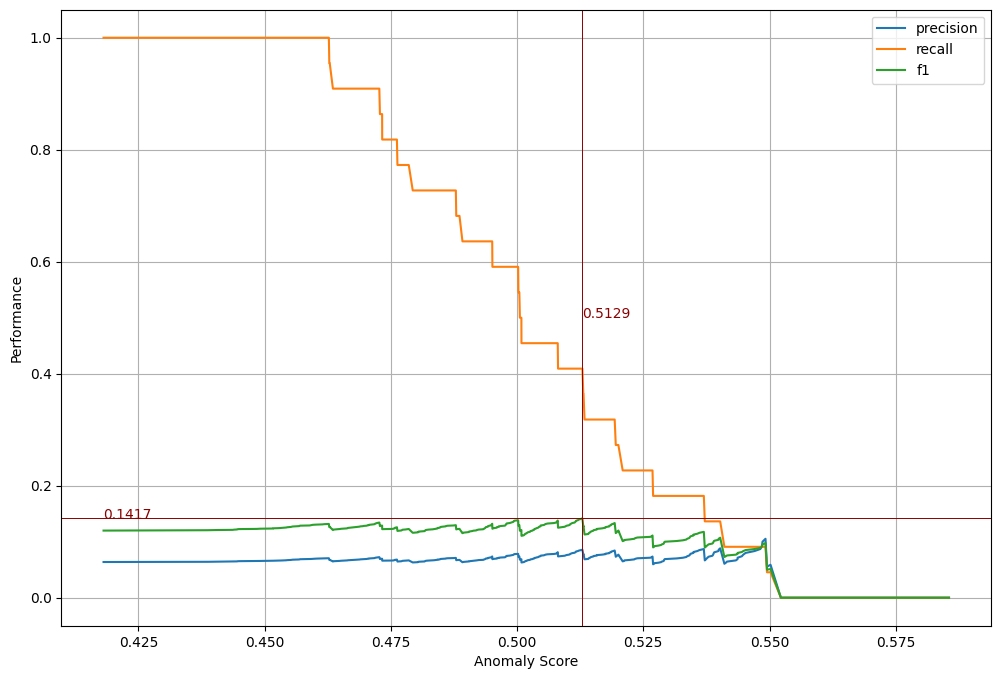

In [ ]:
precision, recall, f1, thresholds = prec_rec_f1_curve(y_val, val_score)

### (5) Step3 하이퍼파리미터 튜닝
* grid search 튜닝시 기본값으로 다음을 최적화 합니다.
    * 회귀 : r2_score
    * 분류 : accruracy
* 우리는 accuracy가 아닌 f1 score 최대화를 위한 튜닝을 진행하고자 합니다.
    * 그러나 클래스 불균형으로 인해 f1 score로 튜닝시 결과가 nan이 나옵니다. 
    * 그래서 수동으로(for loop!)로 튜닝을 시도합니다.

* 다음의 구조로 코드를 수행하고자 합니다.
    * 튜닝하고자 하는 하이퍼파라미터 값을 조정하며 반복 수행
        * 하나의 하이퍼파라미터 값에 대해 5번 반복수행하며 성능 측정하고 평균 계산
            * isolation forest는 랜덤으로 트리를 생성하기 때문에 수행할 때마다 조금씩 성능이 달라집니다. 그래서 5번 반복수행한 후 성능의 평균을 계산합니다.


#### 1) contamination 값 찾기

In [ ]:
f1

In [ ]:
cutoff_f1max = thresholds[np.argmax(f1)]
cutoff_f1max

In [ ]:
new_cont = sum(score >= cutoff_f1max) / len(score)
new_cont

#### 2) n_estimators

In [ ]:
n_est = range(20,501,20)
f1 = []
for t in tqdm(n_est) :
    f1_temp = []
    for i in range(5) :
        model = IsolationForest(contamination=cont, n_estimators=t)
        model.fit(x_train)
        pred = model.predict(x_val)
        pred = np.where(pred == 1, 0, 1)
        f1_temp.append(f1_score(y_val, pred, pos_label=1))

    f1.append(np.mean(f1_temp))


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(n_est, f1, marker = '.')
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.grid()
plt.show()

#### 3) max_samples

In [ ]:
x_train.shape

In [ ]:
m_sam = range(100,801,100)
f1 = []
for s in tqdm(m_sam) :
    f1_temp = []
    for i in range(5) :
        model = IsolationForest(contamination = cont, n_estimators = 300, max_samples = s)
        model.fit(x_train)
        pred = model.predict(x_val)
        pred = np.where(pred == 1, 0, 1)
        f1_temp.append(f1_score(y_val, pred, pos_label=1))

    f1.append(np.mean(f1_temp))


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(m_sam, f1, marker = '.')
plt.ylabel('F1 Score')
plt.xlabel('max_samples')
plt.grid()
plt.show()

## 3.실습 : Semiconductor manufacturing process dataset


![](https://assets.pandaily.com/uploads/2021/10/semiconductor.png)

* 반도체 제조 공정은 시점별로 수많은 센서로부터 정보를 수집하여 공정을 감시합니다. 
* 센서정보와 함께 공정간 발생된 불량품에 대한 정보를 저장하였습니다.
* 불량을 예측해 봅시다.

### (1) 데이터 준비

* 데이터 로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/secom_9.csv"
data = pd.read_csv(path)

data['label'] = 0
data.loc[data['defeat']== 'defeat', 'label']= 1
data.drop(['datetime','defeat'], axis = 1, inplace=True)
data.head()

,v021,v087,v088,v089,v114,v115,v116,v117,v118,v120,...,v528,v571,v572,v573,v574,v575,v576,v577,v578,label
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


변수 정보 
* label : 1 - 불량, 0 - 정상
* v### : 센서값들


In [ ]:
target = 'label'

In [ ]:
data[target].value_counts() / data.shape[0]

0    0.933631
1    0.066369
Name: label, dtype: float64

* x, y로 나누기 

In [ ]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 20)

In [ ]:
print(x_train.shape, x_val.shape)

(1253, 52) (314, 52)


### (2) Step1 : 기본 모델링
> * contamination 만 train셋 y의 비율로 지정하여 학습하시오.
* score 점수를 뽑고 분포를 살펴보시오.
* validation 셋으로 예측을 하고, 평가해 봅시다.

#### 1)모델링

In [ ]:
# contamination=0.068로 지정하고 모델을 생성해 봅시다.
model = IsolationForest(contamination=0.068)

# 비지도 학습입니다. x_train만 사용!
model.fit(x_train)

IsolationForest(contamination=0.068)

#### 2)예측 및 평가

In [ ]:
# 예측
pred = model.predict(x_val)

# 결과를 1,0으로 변환(np.where)
pred = np.where( pred == 1  , 0 , 1  )

# 분류 결과를 평가해 봅시다.
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[280  18]
 [ 15   1]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       298
           1       0.05      0.06      0.06        16

    accuracy                           0.89       314
   macro avg       0.50      0.50      0.50       314
weighted avg       0.90      0.89      0.90       314



### (3) Step2 : Scoring & 최적의 cutoff

* score 점수를 이용하여, 수동으로 cut-off 조절해가며 지표 계산 및 그래프를 그려 봅시다.

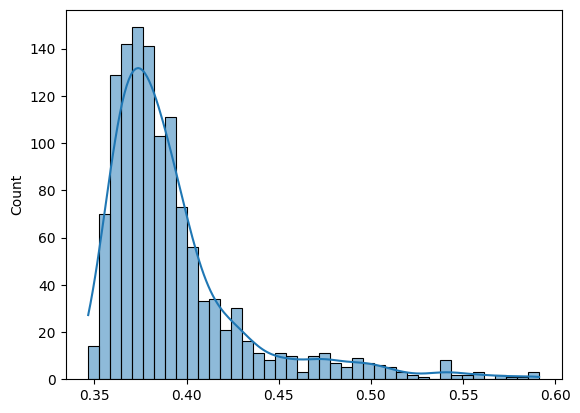

In [ ]:
# 학습 데이터에 대한 abnormal 점수 계산
tr_score = model.score_samples(x_train)

# 0~1 의 값으로 score 바꾸기
tr_score = -1 * tr_score

# score의 분포 살펴보기
sns.histplot(tr_score, kde= True)
plt.show()

* score 점수를 이용하여, 수동으로 cut-off 조절해가며 지표 계산 및 그래프를 그려 봅시다.
    * prec_rec_f1_curve 함수 이용
    * validation set 이용

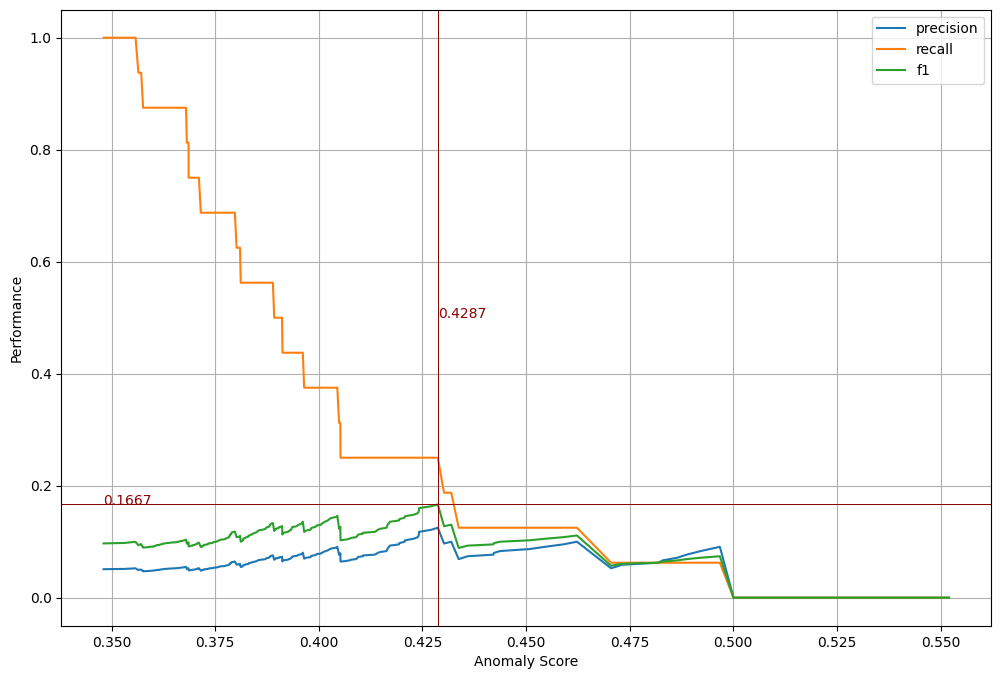

In [ ]:
# validation score 계산
va_score = model.score_samples(x_val)

# 0~1 의 값으로 score 바꾸기
va_score = -1 * va_score

# prec_rec_f1_curve 이용하여 최적의 cutoff 찾기

_, _, _, _ = prec_rec_f1_curve(y_val, va_score)

* f1값을 최대화 하는 cut-off 값을 구해봅시다.

In [ ]:
pred = np.where(va_score >= 0.4287,1,0)

In [ ]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[270  28]
 [ 12   4]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       298
           1       0.12      0.25      0.17        16

    accuracy                           0.87       314
   macro avg       0.54      0.58      0.55       314
weighted avg       0.92      0.87      0.89       314



### (4) Step3 : 하이퍼파라미터 튜닝
> * 다음의 하이퍼파라미터를 각각 조절하며, f1 스코어를 구하고, 경향과, 적절한 지점을 파악해 봅시다.
    * n_estimators
    * max_samples

#### 1) contamination 값 찾기

#### 2) n_estimators

#### 3) max_samples